In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import BisectingKMeans
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.cluster import KMeans
import sys


## Question 1

#### (a) 

In [9]:
neur1 = pd.read_csv('C:/Users/filip/Downloads/neurons_group_1.csv')
neur1.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


#### (b)

From the loaded data above, it is possible to get the following data:

- There are 311 neurons in the dataset
- There are 9 different measurements in the dataset
- There are no missing values in the dataset

In [10]:
len(neur1.id)

311

In [11]:
len(neur1.columns)

9

In [12]:
neur1.isnull()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False


#### (c)

To perform an Exploratory Data Analysis (EDA), the data was segragated in four different categories:

1. Very Small (Average Diameter)
2. Small (Overall Depth)
3. Medium (Heigh, Width, Soma Surface)
4. Large (Length, Surface, Volume)

This classification was made to create boxplots that display data that is relatively in scale to the rest of the data. 

For the scatterplot graphical representation, the average diameter variable was chosen as the comparisson variable. This means that other variables were chosen to be plotted against it. From the plots shown below, the following conclusions can be made:

- As seen from the height and width plots, it is to be expected that the diameter of the neuron would dictate those two variables in a linear manner
- Similarly, the surface area and the volume increase proportional to their mathematical definitions and is visible in the last two plots

In [13]:
neur1_sum = neur1.drop('id',axis=1)
neur1_sum.describe()

neur1_med = neur1_sum.drop(['average_diameter','overall_depth','total_length','total_surface','total_volume'],axis=1)
neur1_lrg = neur1_sum.drop(['average_diameter','overall_depth','overall_height','overall_width','soma_surface'],axis=1)

Text(0, 0.5, 'Quantity')

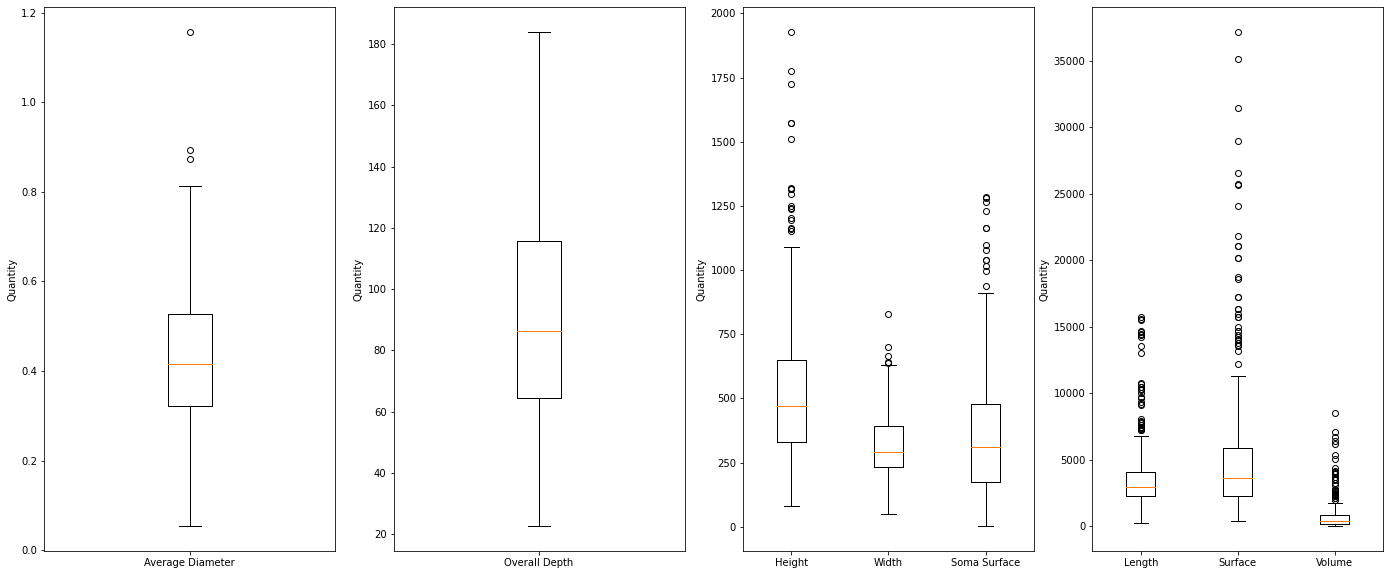

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(1,4,1)
plt.boxplot(x=neur1_sum.average_diameter,labels=['Average Diameter'])
plt.ylabel('Quantity')
plt.subplot(1,4,2)
plt.boxplot(x=neur1_sum.overall_depth,labels=['Overall Depth'])
plt.ylabel('Quantity')
plt.subplot(1,4,3)
plt.boxplot(x=neur1_med,labels=['Height','Width','Soma Surface'])
plt.ylabel('Quantity')
plt.subplot(1,4,4)
plt.boxplot(x=neur1_lrg,labels=['Length','Surface','Volume'])
plt.ylabel('Quantity')

Text(0.5, 0, 'Average Diameter')

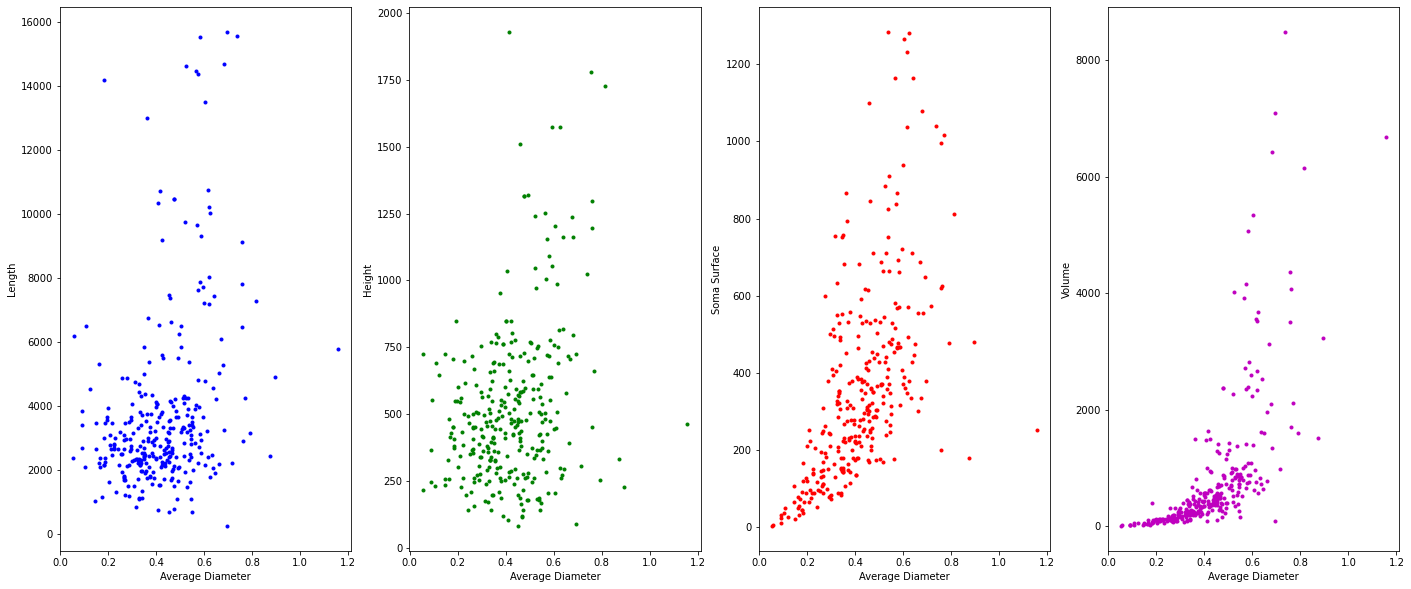

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,4,1)
plt.plot(neur1_sum.average_diameter,neur1_sum.total_length,color='b',linestyle='None',marker='.')
plt.ylabel('Length')
plt.xlabel('Average Diameter')
plt.subplot(1,4,2)
plt.plot(neur1_sum.average_diameter,neur1_sum.overall_height,color='g',linestyle='None',marker='.')
plt.ylabel('Height')
plt.xlabel('Average Diameter')
plt.subplot(1,4,3)
plt.plot(neur1_sum.average_diameter,neur1_sum.soma_surface,color='r',linestyle='None',marker='.')
plt.ylabel('Soma Surface')
plt.xlabel('Average Diameter')
plt.subplot(1,4,4)
plt.plot(neur1_sum.average_diameter,neur1_sum.total_volume,color='m',linestyle='None',marker='.')
plt.ylabel('Volume')
plt.xlabel('Average Diameter')

## Question 2

#### (a)

In [16]:
neur2 = pd.read_csv('C:/Users/filip/Downloads/neurons_group_2.csv')
neur2.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


#### (b) 

From the loaded data above, it is possible to get the following data:

- There are 390 neurons in the dataset
- There are 9 different measurements in the dataset and they are the same as the neurons_group_1.csv measurements
- There are no missing values in the dataset

In [17]:
len(neur2.id)

390

In [18]:
len(neur1.columns)

9

In [19]:
neur1.isnull()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False


#### (c)

By refering to Q1 part (c), it is evident that the measurement values for neurons is not in scale, hence the data was standardized. 

In [20]:
neur1_sum = neur1.drop(['id','average_diameter'],axis=1)
neur2_sum = neur2.drop(['id','average_diameter'],axis=1)
neur1_std = (neur1_sum-neur1_sum.mean())/neur1_sum.std()
neur2_std = (neur2_sum-neur2_sum.mean())/neur2_sum.std()


In [21]:
def t_test (df1,df2):
    df_list = []
    t_df = []
    name_1 = []
    for idx, column in enumerate(df1.columns):
        a = pd.DataFrame(stats.ttest_ind(df1.iloc[:,idx],df2.iloc[:,idx]))
        df_list.append(a)
        t_stat = column + ' T-statistic'
        name_1.append(t_stat)
        p_val = column + ' p-value'
        name_1.append(p_val)
    
            
    t_df = pd.concat(df_list)
    t_df.index = [name_1]
    t_df.columns=['Value']
            
    return t_df

t_test(neur1_std,neur2_std)

,Value
overall_depth T-statistic,2.428681e-14
overall_depth p-value,1.000000e+00
overall_height T-statistic,2.159825e-14
overall_height p-value,1.000000e+00
overall_width T-statistic,-3.792033e-15
overall_width p-value,1.000000e+00
soma_surface T-statistic,6.284479e-15
soma_surface p-value,1.000000e+00
total_length T-statistic,-8.367361e-15
total_length p-value,1.000000e+00


## Question 3

#### (a)

In [22]:
neur3 = pd.read_csv('C:/Users/filip/Downloads/neurons_additional_measurements.csv')
neur4 = pd.merge(neur1,neur2,how='outer')
neur = pd.merge(neur4,neur3,how='outer')
neur_sum = neur.drop(['id'],axis=1)
neur_std = (neur_sum-neur_sum.mean())/neur_sum.std()
neur_int = neur_std.interpolate()
neur_fr = neur_sum.interpolate()

#### (b)

From the data shown below, it is possible to make the following conclusions:

- There are 701 rows in the dataset
- There are 21 columns in the merged dataset
- There were missing values in the dataset, hence the interpolation function was called for to fill in the missing values
- Dataset neurons_additional_measurements had some entries missing, but once the interpolation function was called, there were 701 rows of data

In [23]:
len(neur.id)

701

In [24]:
len(neur.columns)

21

In [25]:
neur_int.isnull().sum().sum()

0

In [26]:
stats.pearsonr(neur_std.iloc[:,0],neur_std.iloc[:,0])

(0.9999999999999987, 0.0)

In [27]:
neur_sum.iloc[:,19]

0      39.0
1      37.0
2      18.0
3      19.0
4      21.0
       ... 
696    29.0
697    26.0
698    91.0
699    53.0
700    18.0
Name: number_tips, Length: 701, dtype: float64

 #### (c)
 
To compute all the necessary dataframes to include the necessary information for part (c), funcion 'pearson' was created. This function returns two data frames. The first data frame shows correlation between all variables and their respective p-values. 
0 value is put in place for values that either:
 - Repeat somewhere before in the dataframe
 - The value was a result of finding correlation with itself
 
The second dataframe holds the four maximum values from the first dataframe. The function was created so it:
 - Finds 4 maximum values in each column
 - Combines the maximum values in a single column
 - Finds 4 maximum values from that column

This was done in order to eliminate the possiblity that 4 maximum values in the entire dataframe could be located in the same column. 

From observing both of the dataframes below, the following 4 measurements were found to have the largest correlation:

- number_tips vs number_branches -> 0.9982
- number_branches vs number_bifurcations -> 0.9979
- number_nodes vs total_length -> 0.9954
- number_tips vs number_bifurcations -> 0.9924 

In [28]:
def pearson (df):
    p_df=pd.DataFrame()
    max_df = pd.DataFrame()
    idx_df = pd.DataFrame()
    max_sr = pd.DataFrame()
    p_df_list=[]
    max_list = []
    idx_list = []
    row_list = []
    for idx, icol in enumerate(df.columns):
        p_df_list.clear()
        
        for jdx, jcol in enumerate(df.columns):
            
            if jdx==idx or jdx<idx:
                
                b = pd.Series(np.array([0,0]))
                p_df_list.append(b)
                continue
                
            else:
                a = pd.DataFrame(stats.pearsonr(df.iloc[:,idx],df.iloc[:,jdx]))
                p_df_list.append(a)
            
        col_name = str(icol) + ' vs all'
        p_df.loc[:,col_name] = pd.concat(p_df_list)
        
        row_name1 = str(icol)
        row_list.append(row_name1)
        row_name2 = str(icol) + ' p-value'
        row_list.append(row_name2)   
        

    p_df.index = [row_list]
    
    for idx, icol in enumerate(df.columns):
        c = p_df.iloc[:,idx].nlargest(4)
        d = p_df.iloc[:,idx].nlargest(4).index
        idx_list.append(d)
        max_list.append(c)
        max_df = pd.concat(max_list)
        
    max_sr = max_df.nlargest(4)

    return p_df,max_sr,max_df

p_df,max_sr,idx_df = pearson(neur_int) 


In [29]:
def index (df, val):
    pos = []
    value = round(val,4)
    result = df.isin([value])
    col_name_df = result.any
    col_name = col_name_df(col_name_df == True).index
    
    for column in col_name:
        row_name = result[column][result[column] == True].index
        col = str(column)
        
        for row in row_name:
            ro = str(row)            
            app = ro+' '+col
            app_1 = app.translate({ord(i): None for i in '()'})
            pos.append(app_1)
            
    return pos


rded = p_df.round(decimals = 4)
pos_df = pd.DataFrame()

for i in max_sr:
    
    pos_df[i]=[index(rded,i)]

pos_df

,0.998220,0.997981,0.995459,0.992423
0,"['number_tips', number_branches vs all]","['number_branches', number_bifurcations vs all]","['number_nodes', total_length vs all]","['number_tips', number_bifurcations vs all]"


#### (d)
Since the correlations obtained in part (c) were close to 1, the correlation scatter plot would be virtually a "straight line". By observing the plots below, it is evident that the statement made above is correct and the values indeed show an almost perfect linear correlation.

Text(0.5, 1.0, 'corr=0.9924')

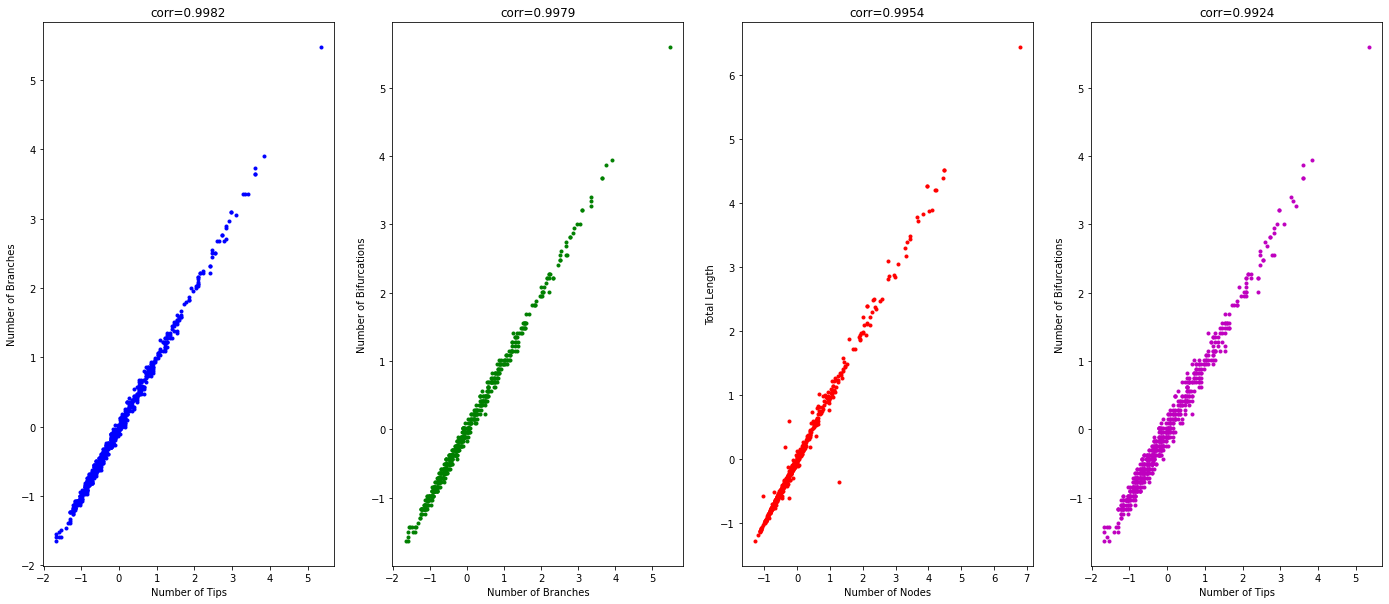

In [30]:
plt.figure(figsize=(24,10))
plt.subplot(1,4,1)
plt.plot(neur_int.number_tips,neur_int.number_branches ,color='b',linestyle='None',marker='.')
plt.ylabel('Number of Branches')
plt.xlabel('Number of Tips')
plt.title('corr=0.9982')
plt.subplot(1,4,2)
plt.plot(neur_int.number_branches,neur_int.number_bifurcations ,color='g',linestyle='None',marker='.')
plt.ylabel('Number of Bifurcations')
plt.xlabel('Number of Branches')
plt.title('corr=0.9979')
plt.subplot(1,4,3)
plt.plot(neur_int.number_nodes,neur_int.total_length ,color='r',linestyle='None',marker='.')
plt.ylabel('Total Length')
plt.xlabel('Number of Nodes')
plt.title('corr=0.9954')
plt.subplot(1,4,4)
plt.plot(neur_int.number_tips,neur_int.number_bifurcations ,color='m',linestyle='None',marker='.')
plt.ylabel('Number of Bifurcations')
plt.xlabel('Number of Tips')
plt.title('corr=0.9924')

## Question 4

#### (a)

In [31]:
neur_pred = neur_int.drop(['total_surface'],axis=1)
neur_res = neur_int['total_surface']
neur_pred.insert(0,'intercept',1)

#### (b)

In [32]:
mod = sm.OLS(neur_res,neur_pred)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4481.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:19:51   Log-Likelihood:                 681.69
No. Observations:                 701   AIC:                            -1325.
Df Residuals:                     682   BIC:                            -1239.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

#### (c)

While conducting the AIC regression, it was determined that the most influential  parameters in the model were Total Volume, Soma surface, Overall height and Average diameter. According to the forward selection AIC, if only those parameters were included in the final regression model, the predicted variable would still be accurate. 

In [33]:
def AIC(df_pred,df_res):
    
    
    model_og = sm.OLS(df_res,df_pred['intercept'])
    res_og = model_og.fit()
    aic_og = res_og.aic 
    aic_list=[]
    aic_idx=[]
    aic_nam=[]
    name_sr=[]
    
    temp = []
    aic_curr = aic_og
    
    for jdx, jcol in enumerate(df_pred):
        
        for idx, icol in enumerate(df_pred):
            if jdx==0 & idx==0:
                temp = [0,idx]
            
            temp[-1]=idx
            if idx in temp[:-1]:
                continue
          
            
            model_temp = sm.OLS(df_res,df_pred.iloc[:,temp])
            res_temp = model_temp.fit()
            aic_temp = res_temp.aic
            aic_list.append(aic_temp)
            aic_idx.append(idx)
            aic_nam.append(icol)
          
            
        
       
        aic_compval = min(aic_list)
        aic_ind = aic_list.index(aic_compval)
        
        name_ind = aic_ind - (len(temp)-2)
        
        
        if aic_compval<aic_curr:
            aic_curr = aic_compval
            temp.insert(-1,aic_ind)
            name_sr.append(aic_nam[name_ind])
        else:
            break
       
        aic_list.clear()
        aic_idx.clear()
        aic_nam.clear()       
            
    return(name_sr)
        
                
        
AIC(neur_pred,neur_res)

['total_volume', 'soma_surface', 'overall_height', 'average_diameter']

#### (d)

When fitting the BIC model, the forward selection BIC algorithm found the variables 'total volume', 'soma surface' and 'overall height' to be the most influential. The difference between the AIC and BIC algorithm is that BIC algorithm does not include the variable 'average diameter'.

In [49]:
def BIC(df_pred,df_res):
    
    
    model_og = sm.OLS(df_res,df_pred['intercept'])
    res_og = model_og.fit()
    bic_og = res_og.bic 
    bic_list=[]
    bic_idx=[]
    bic_nam=[]
    name_sr=[]
    
    temp = []
    bic_curr = bic_og
    
    for jdx, jcol in enumerate(df_pred):
        
        for idx, icol in enumerate(df_pred):
            if jdx==0 & idx==0:
                temp = [0,idx]
            
            temp[-1]=idx
            if idx in temp[:-1]:
                continue
          
            
            model_temp = sm.OLS(df_res,df_pred.iloc[:,temp])
            res_temp = model_temp.fit()
            bic_temp = res_temp.bic
            bic_list.append(bic_temp)
            bic_idx.append(idx)
            bic_nam.append(icol)
          
            
        
       
        bic_compval = min(bic_list)
        bic_ind = bic_list.index(bic_compval)
        
        name_ind = bic_ind - (len(temp)-2)
        
        
        if bic_compval<bic_curr:
            bic_curr = bic_compval
            temp.insert(-1,bic_ind)
            name_sr.append(bic_nam[name_ind])
        else:
            break
       
        bic_list.clear()
        bic_idx.clear()
        bic_nam.clear()       
            
    return(name_sr)
        
                
        
BIC(neur_pred,neur_res)

['total_volume', 'soma_surface', 'overall_height']

#### (e)

When comparing AIC and BIC, the main difference between the two is the goal that each algorithm is trying to achieve. AIC is trying to find the best possible outcome that matches a hypothetical approximation of what the best algorithm for the specific situation is. On the other hand, BIC tries to find the best possible approximation given the parameters in the particular situation. In other words, AIC tries to match a hypothetical model while BIC tries to make the best out of what is given via the parameters. 

## Question 5

#### (a)

In [34]:
neur_fr

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,48.081967,0.866582,7.0,476.921223,550.691106,31.0,70.0,3041.0,8.0,39.0
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,52.416667,0.950502,15.0,650.637431,957.710930,30.0,67.0,3271.0,7.0,37.0
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,73.821429,0.816243,5.0,477.440600,569.974920,14.0,32.0,2151.0,4.0,18.0
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,42.266667,0.822614,4.0,212.448082,249.521471,16.0,35.0,1292.0,3.0,19.0
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,39.733333,0.803137,3.0,242.351930,258.868561,15.0,36.0,1397.0,6.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,91.555459,0.863968,44.804348,0.987527,6.0,188.685223,221.489383,23.0,52.0,2246.0,6.0,29.0
697,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,77.900825,0.919881,41.613636,0.811129,4.0,208.960395,230.849635,22.0,48.0,1934.0,4.0,26.0
698,0.682420,140.7840,1465.667623,549.027038,589.639480,16393.372040,35156.450590,6387.544545,76.931788,0.869628,82.807229,0.983187,17.0,1279.217738,1399.216195,83.0,174.0,13862.0,8.0,91.0
699,0.500792,172.8656,736.768599,487.972675,412.997691,7001.423255,11103.672810,1470.613203,65.800629,0.923745,61.347368,1.001120,7.0,574.428357,681.880147,48.0,101.0,5874.0,5.0,53.0


In [35]:
X = neur_fr.drop(['total_surface'],axis=1)
Y = Series(neur_fr.total_surface)

#### (b)

In [36]:
train_size = 526
np.random.seed(55)
train_select = np.random.permutation(range(len(Y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
Y_train = Y[train_select[:train_size]].reset_index(drop=True)
Y_test = Y[train_select[train_size:]].reset_index(drop=True)
rf = RandomForestRegressor(n_estimators=10,random_state=101)
rf.fit(X_train, Y_train)
col_nam = X.columns
featimpot = Series(rf.feature_importances_,index=col_nam)
featimpot.nlargest(4)

total_volume       0.872703
total_length       0.049738
number_nodes       0.029178
number_branches    0.018301
dtype: float64

#### (c)

From the plot below, it is evident that the ML model is pretty accurate when predicting the value of the 'total_surface' when given other parameters. The data is heavily concentrated around the line of best fit.

479170.85457964777


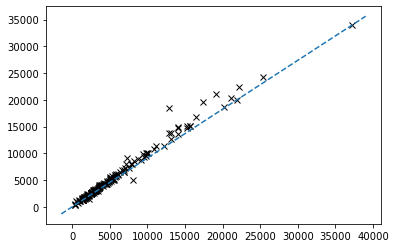

In [37]:
i = 'mark'
rf_test_pred = rf.predict(X_test)
fig = plt.figure()
plt.plot(Y_test,rf_test_pred,'kx')
plt.plot(plt.xlim(),plt.ylim(),ls='--')
MSE_rf = mean_squared_error(Y_test,rf_test_pred)
MSE_df = DataFrame()
MSE_df=MSE_df.append({i:MSE_rf},ignore_index=True)
print(MSE_rf)


#### (d)

While performing the requested task from Question 5, part (d), the findings are shown in the graph below. The graph shows the performance metrics expressed as functions of Mean Squared Error (MSE) and number of trees. The two metrics graphed are Standard Error and mean of the MSEs for the number of iterations (in this case the number of iterations is 30). 

From the graph below, a heuristic claim can be made to judge the performance of the model. It is a fact that by increasing the tree count in the model, the time and cost to compute the data increases as well. Because of this reason, by heuristically assessing the performance, the most optimal number of trees was found to be 50. By setting the number of trees to 50, the errors are minimized with respect to the time taken to finish the computation.

[56048.34391490781]
[1751135.982686578]
[56048.34391490781, 56174.913035422695]
[1751135.982686578, 1542583.7240123267]
[56048.34391490781, 56174.913035422695, 53926.68132423643]
[1751135.982686578, 1542583.7240123267, 1326628.9517916618]
[56048.34391490781, 56174.913035422695, 53926.68132423643, 52621.23434936234]
[1751135.982686578, 1542583.7240123267, 1326628.9517916618, 1265043.4795828175]
[56048.34391490781, 56174.913035422695, 53926.68132423643, 52621.23434936234, 52198.606258541964]
[1751135.982686578, 1542583.7240123267, 1326628.9517916618, 1265043.4795828175, 1241077.6557438462]
[56048.34391490781, 56174.913035422695, 53926.68132423643, 52621.23434936234, 52198.606258541964, 52275.18686497457]
[1751135.982686578, 1542583.7240123267, 1326628.9517916618, 1265043.4795828175, 1241077.6557438462, 1227391.9291705792]
[56048.34391490781, 56174.913035422695, 53926.68132423643, 52621.23434936234, 52198.606258541964, 52275.18686497457, 52238.71971397139]
[1751135.982686578, 1542583.7240

C:\Users\filip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\filip\AppData\Local\Temp/ipykernel_9204/1373187017.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  pt1.set_xticklabels(perf)
C:\Users\filip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


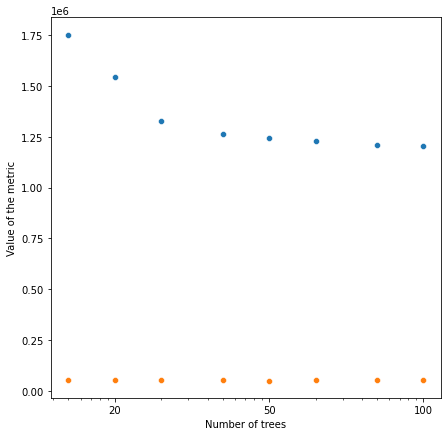

In [50]:
def performance(X,Y):
    
    perf = [5,10,20,50,100,200,500,1000]
    pred_time = 30
    train_size = 526
    MSE_ls = []
    SE_ls = []
    MN_ls = []
    
    for perf_n in perf:
        
        MSE_ls.clear()
        for i in range(pred_time):
            np.random.seed(i)
            train_select = np.random.permutation(range(len(Y)))
            X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
            X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
            Y_train = Y[train_select[:train_size]].reset_index(drop=True)
            Y_test = Y[train_select[train_size:]].reset_index(drop=True)
            rf = RandomForestRegressor(n_estimators=perf_n,random_state=101)
            rf.fit(X_train, Y_train)
            rf_test_pred = rf.predict(X_test)
            MSE_rf = mean_squared_error(Y_test,rf_test_pred)
            MSE_ls.append(MSE_rf)
    
            
        MSE_sr = pd.Series(MSE_ls)   
        MSE_std = MSE_sr.std()
        MSE_len = pred_time
        SE = MSE_std/MSE_len
        MN = np.mean(MSE_sr)
        SE_ls.append(SE)
        MN_ls.append(MN)
        
        print(SE_ls)
        print(MN_ls)
        
        
        
    
    
    SE_sr = pd.Series(data = SE_ls, index=perf)
    MN_sr = pd.Series(data=MN_ls, index=perf)
    data = pd.DataFrame(data={'X': perf, 'Y': MN_sr,'Z': SE_sr})
    f, ax = plt.subplots(figsize=(7,7))
    ax.set(xscale="log")
    pt1 = sns.scatterplot("X","Y",data=data,ax=ax)
    pt1.set_xticklabels(perf)
    pt2 = sns.scatterplot("X","Z",data=data,ax=ax, legend='auto')
    
    ax.set(xlabel='Number of trees',ylabel='Value of the metric')



    

performance(X,Y)



    
    
    

#### (e)

The rationale for fitting the model multiple times with random states stems from ensuring that the experiment variables don't have invalid correlations, variances or even that the variables are biased. By fitting the model multiple times and using a different random state each time, ensures that the above mentioned parameters stay as they are meant to be.

## Question 6

#### (a)

A good method of estimating K-means clustering peroformance is the 'Elbow Criterion'. The Elbow Criterion looks at the Sum of Squared Error (SSE) for each number of clusters. The objective of this heuristic method is to identify for which value of number of clusters does the value of SSE rech an acceptable range. That is, when does the rate of the decrease in SSE start reducing exponentially. For the purpose of this assignment, it is evident that the optimal number of clusters is 3.


C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

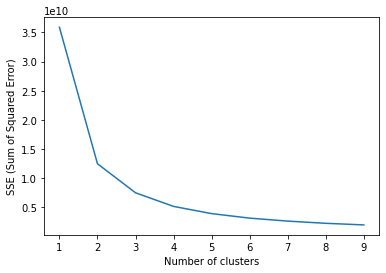

In [39]:
SSE = {}
for i  in range (1,10):
    kmc = KMeans(n_clusters=i).fit(neur_fr)
    X["clusters"]=kmc.labels_
    SSE[i] = kmc.inertia_

plt.figure()
plt.plot(list(SSE.keys()),list(SSE.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Sum of Squared Error)")
plt.show()

#### (b)

By performing the specified k-means cluster analysis where the goal was to identify the most discriminatory variables after performing a k-cluster analysis using 3 clusters. The most discriminatory variables were found to be:

- Total Length
- Total Surface
- Total Volume

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


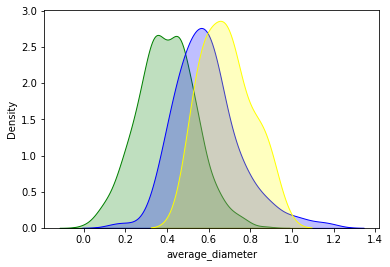

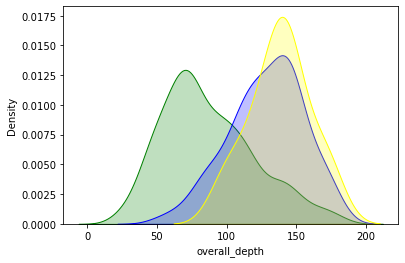

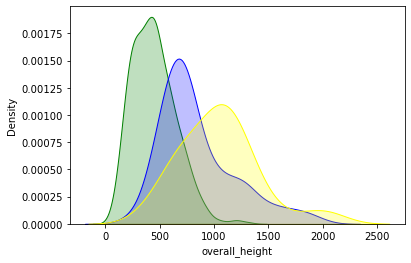

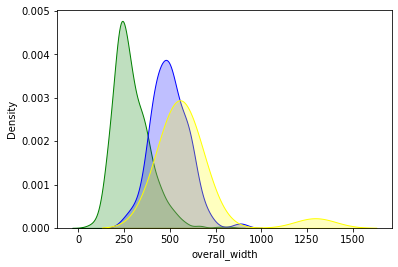

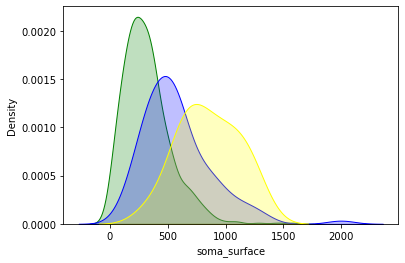

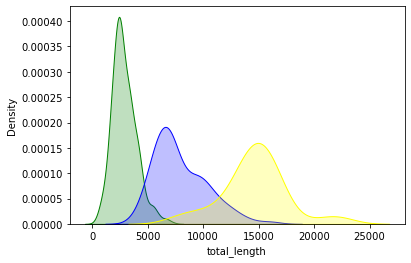

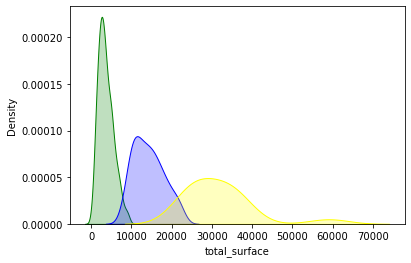

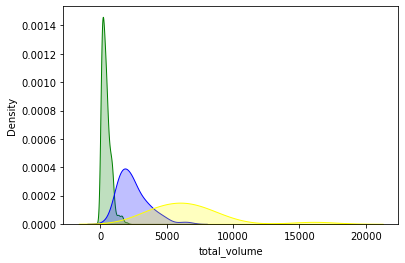

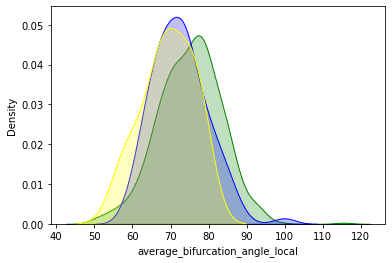

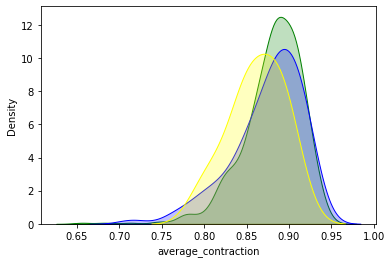

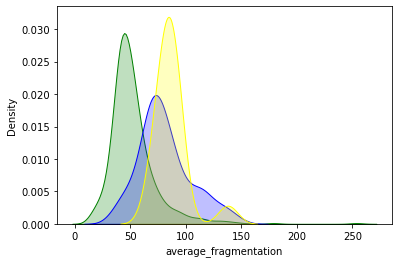

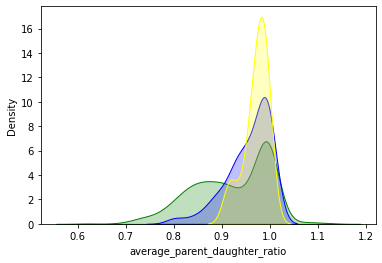

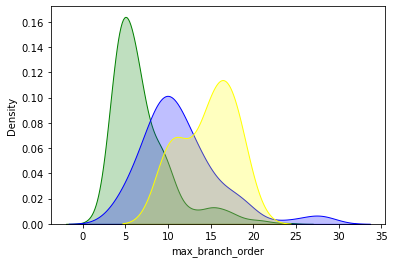

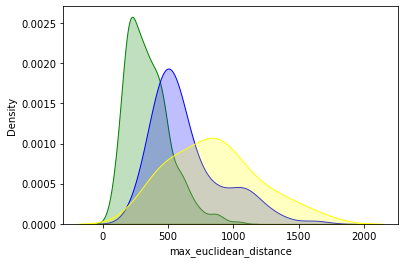

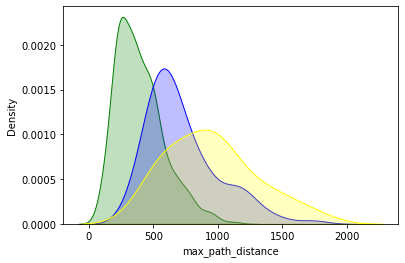

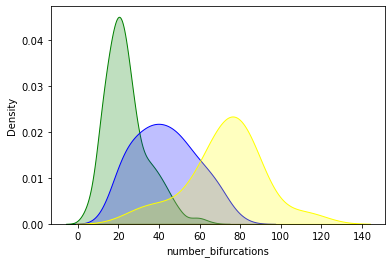

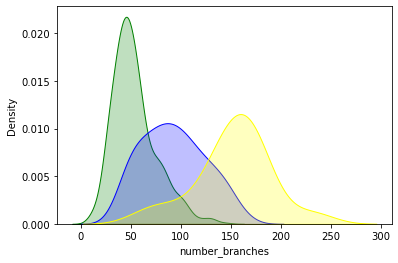

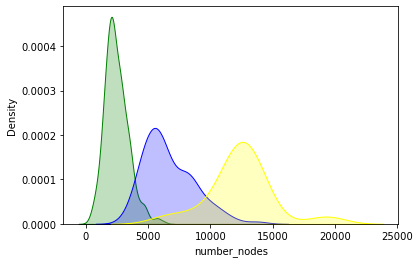

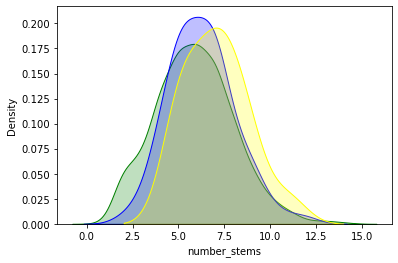

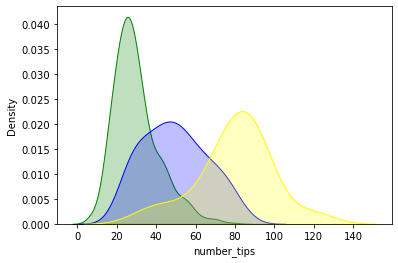

In [40]:
kmodel = KMeans(n_clusters = 3)
kmodel.fit(neur_fr)
kpred = kmodel.predict(neur_fr)
newdf = neur_fr
pred0 = kpred == 0
pred1 = kpred == 1
pred2 = kpred == 2



for n,i in enumerate(neur_fr.columns):
    
    predtemp0 = neur_fr.iloc[pred0,[n]]
    predtemp1 = neur_fr.iloc[pred1,[n]]
    predtemp2 = neur_fr.iloc[pred2,[n]]   
    
    res1 = sns.kdeplot(predtemp0[i],color='green',shade=True)
    res2 = sns.kdeplot(predtemp1[i],color='blue',shade=True)
    res3 = sns.kdeplot(predtemp2[i],color='yellow',shade=True)
    
    
    plt.show()
    
    


#### (c)
The variables below stood out with the most obvious and the most extreme variation between clusters. By visually observing the plots from below, it is evident that there is a distinct difference in physical variables between neuron groups. Hence, this analysis supports the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset.

Text(0, 0.5, 'Total Volume')

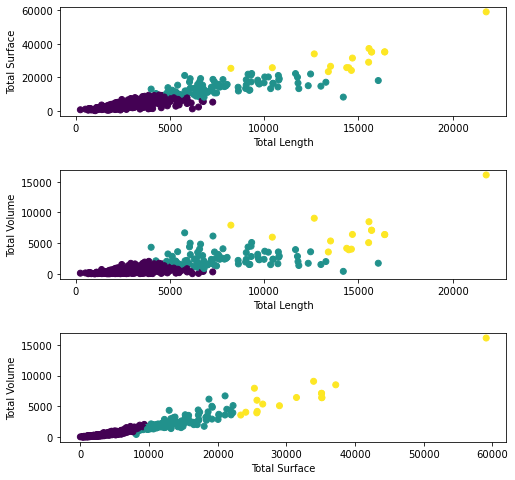

In [41]:
fig = plt.subplots(figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.scatter(neur_fr['total_length'],neur_fr['total_surface'],c=kpred)
plt.xlabel('Total Length')
plt.ylabel('Total Surface')

plt.subplot(3,1,2)
plt.scatter(neur_fr['total_length'],neur_fr['total_volume'],c=kpred)
plt.xlabel('Total Length')
plt.ylabel('Total Volume')

plt.subplot(3,1,3)
plt.scatter(neur_fr['total_surface'],neur_fr['total_volume'],c=kpred)
plt.xlabel('Total Surface')
plt.ylabel('Total Volume')


#### (d)

By observing the different clustering algorithms available in the sklearn module for python, the Bisecting KMeans algorithm was chosen. This algorithm was chosen due to few parameters being considered:

1. Input parameter is 'number of clusters'
2. Flat geometry 

An additional contestant was Spectral Clustering but the Bisecting KMeans algorithm was chosen over it due to geometry requirement.

##### (i) 

By running the adapted algorithm from Q6 (a), the optimal number of clusters was chosen to be 4.

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserW

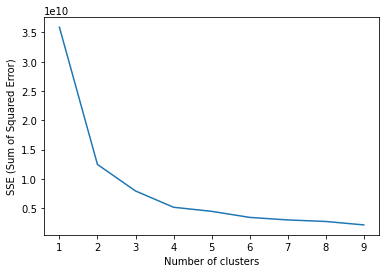

In [42]:
SSE = {}
for i  in range (1,10):
    BKMS = BisectingKMeans(n_clusters=i).fit(neur_fr)
    X["clusters"]=BKMS.labels_
    SSE[i] = BKMS.inertia_

plt.figure()
plt.plot(list(SSE.keys()),list(SSE.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Sum of Squared Error)")
plt.show()

##### (ii)

By performing the specified Bisecting KMeans analysis, where the goal was to identify the most discriminatory variables after performing a Bisecting KMeans analysis using 4 clusters, the most discriminatory variables were found to be:

- Total Length
- Total Surface
- Total Volume

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


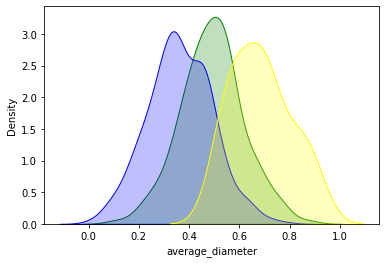

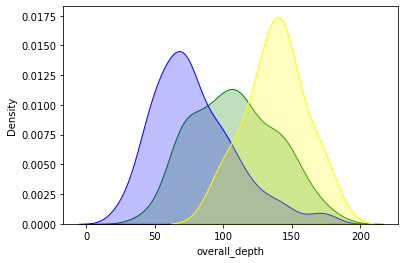

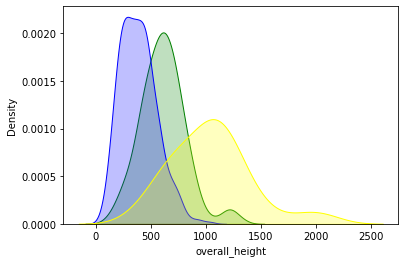

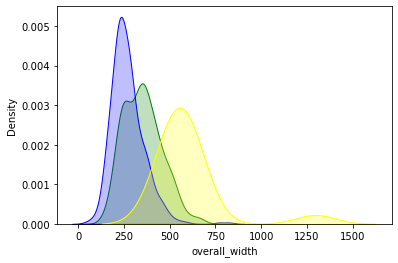

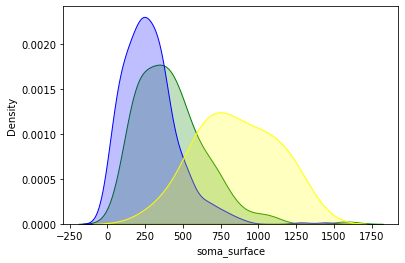

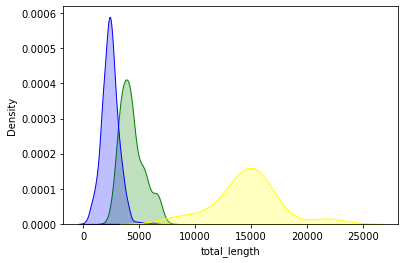

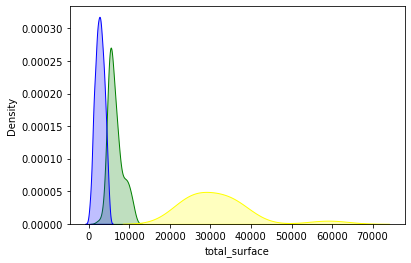

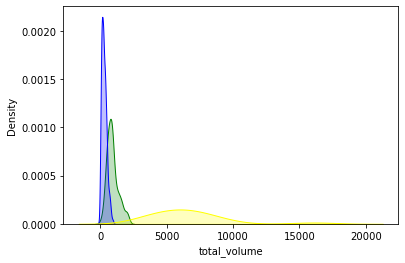

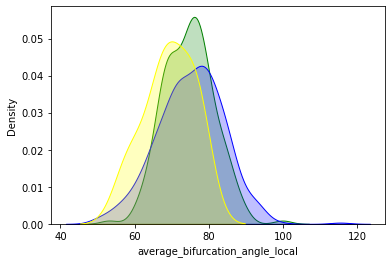

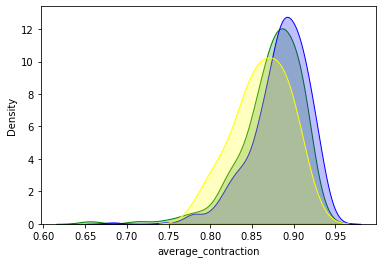

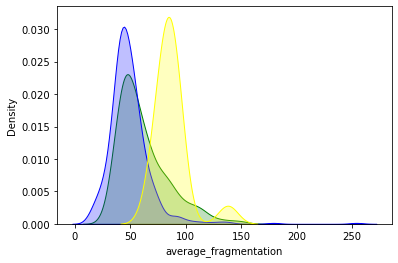

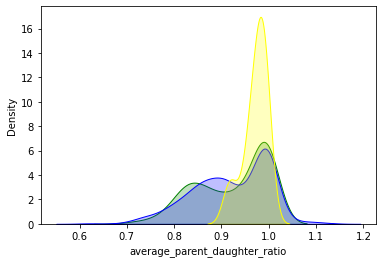

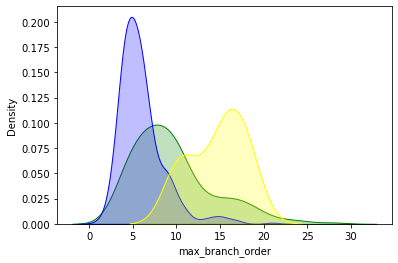

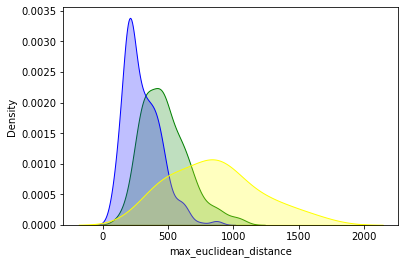

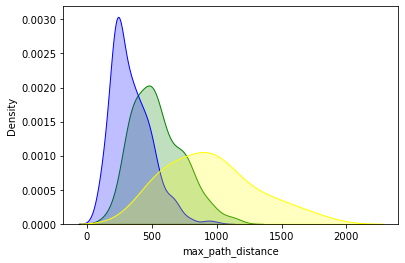

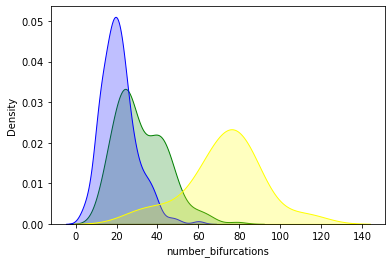

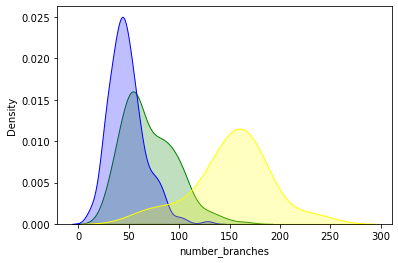

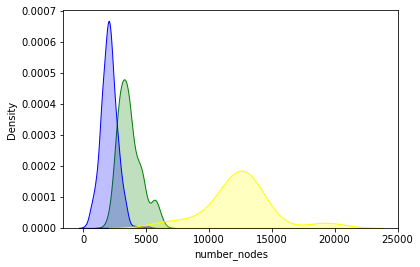

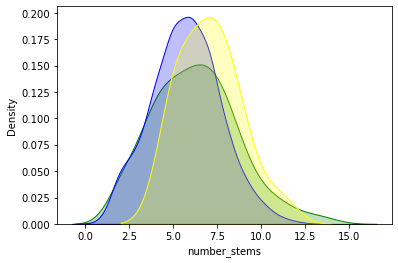

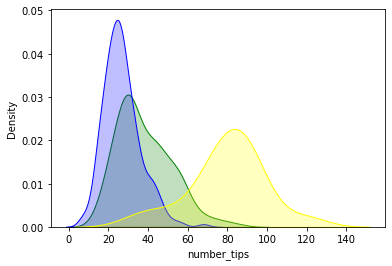

In [43]:
bkmodel = BisectingKMeans(n_clusters = 4)
bkmodel.fit(neur_fr)
bkpred = bkmodel.predict(neur_fr)
pred0 = bkpred == 0
pred1 = bkpred == 1
pred2 = bkpred == 2



for n,i in enumerate(neur_fr.columns):
    
    predtemp0 = neur_fr.iloc[pred0,[n]]
    predtemp1 = neur_fr.iloc[pred1,[n]]
    predtemp2 = neur_fr.iloc[pred2,[n]]   
    
    res1 = sns.kdeplot(predtemp0[i],color='green',shade=True)
    res2 = sns.kdeplot(predtemp1[i],color='blue',shade=True)
    res3 = sns.kdeplot(predtemp2[i],color='yellow',shade=True)
    
    
    plt.show()

##### (iii)

Text(0, 0.5, 'Total Volume')

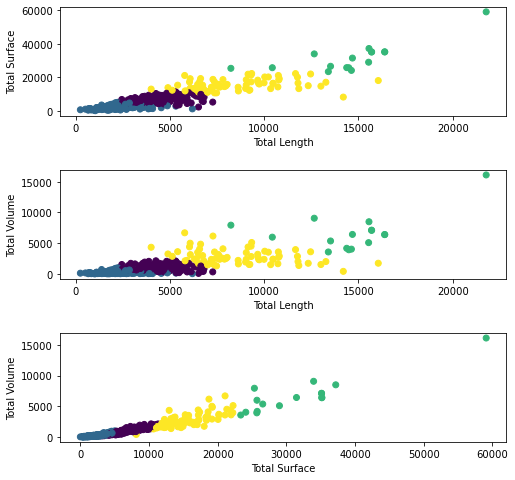

In [44]:
fig = plt.subplots(figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.scatter(neur_fr['total_length'],neur_fr['total_surface'],c=bkpred)
plt.xlabel('Total Length')
plt.ylabel('Total Surface')

plt.subplot(3,1,2)
plt.scatter(neur_fr['total_length'],neur_fr['total_volume'],c=bkpred)
plt.xlabel('Total Length')
plt.ylabel('Total Volume')

plt.subplot(3,1,3)
plt.scatter(neur_fr['total_surface'],neur_fr['total_volume'],c=bkpred)
plt.xlabel('Total Surface')
plt.ylabel('Total Volume')

##### (iv)

To conclude question 6 (d), the results obtained using the Bisecting KMeans algorithm showed similar results to the results of the k-means algorithm. The main difference is that the Bisecting method used more clusters as the optimum number of clusters. Note that the process is heuristic. 
The most discriminatory variables using the Bisecting method were also the pysical variables of the neurons which is to be expected. This once again confirms the statement that the findings support the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset.

“I confirm that all work submitted is my own (Filip Masic) and that I have neither given, sought,
nor received aid in relation to this assignment.”